<a href="https://colab.research.google.com/github/janosepah/ML_Project/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting Electricity Supply and Demand
Team Members (alphabetical order):
-	Samarah Azimpoor
-	Safoura Janosepah


# Power Data Source - IESO

## Market Demand
### Market Demand Definitions and Graphs
The graph below plots values for both Total Market Demand and Ontario Demand.

- **Total Market Demand** represents the total energy that was supplied from the IESO-Administered Market.

The IESO calculates Total Market Demand by summing all output from generators registered in the Market plus all scheduled imports to the province. It is also equal to the sum of all load supplied from the Market plus exports from the province, plus all line losses incurred on the IESO-controlled grid.

- **Ontario Demand** represents the total energy that was supplied from the IESO-Administered Market for the purpose of supplying load within Ontario.

It is also equal to the sum of all loads within Ontario which is supplied from the Market, plus all line losses incurred on the IESO-controlled grid.


**Importing Liblaries**

In [107]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os
import calendar


In [35]:
# Set default plot styles
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 14

**Loading The Data**

In [104]:
# Load Data 
Data_Path = 'https://raw.githubusercontent.com/janosepah/ML_Project/master/Data/'

# Demand
Demand_2017 = pd.read_csv(Data_Path + 'PUB_Demand_2017.csv', parse_dates=['Date'])
Demand_2017.head()
#Demand_2017.shape

Demand_2018 = pd.read_csv(Data_Path + 'PUB_Demand_2018.csv', parse_dates=['Date'])
Demand_2018.head()
#Demand_2018.shape

Demand_2019 = pd.read_csv(Data_Path + 'PUB_Demand_2019.csv', parse_dates=['Date'])
Demand_2019.head()
#Demand_2019.shape

# Supply
Supply_2017 = pd.read_csv(Data_Path + '2017_Hourly_Output.csv', parse_dates=['Date'])
Supply_2017.head()
#Supply_2017.shape

Supply_2018 = pd.read_csv(Data_Path + '2018_Hourly_Output.csv', parse_dates=['Date'])
Supply_2018.head()
#Supply_2018.shape

Supply_2019 = pd.read_csv(Data_Path + '2019_Hourly_Output.csv', parse_dates=['Date'])
Supply_2019.head()
#Supply_2019.shape

# Industry
Industrial_2019 =pd.read_csv(Data_Path + 'Industrial_Load_2019.csv', parse_dates=['DeliveryDate'])
Industrial_2019.head()

Industrial_2018 =pd.read_csv(Data_Path + 'Industrial_Load_2018.csv', parse_dates=['DeliveryDate'])
Industrial_2018.head()

Industrial_2017 =pd.read_csv(Data_Path + 'Industrial_Load_2017.csv', parse_dates=['DeliveryDate'])
Industrial_2017.head()

# DemandZonal
DemandZonal_2017 =pd.read_csv(Data_Path + 'PUB_DemandZonal_2017.csv', parse_dates=['Date'])
DemandZonal_2017.head()

DemandZonal_2018 =pd.read_csv(Data_Path + 'PUB_DemandZonal_2018.csv', parse_dates=['Date'])
DemandZonal_2018.head()

DemandZonal_2019 =pd.read_csv(Data_Path + 'PUB_DemandZonal_2019.csv', parse_dates=['Date'])
DemandZonal_2019.head()

# FuelMonthly
FuelMonthly_2017 =pd.read_csv(Data_Path + 'PUB_GenOutputbyFuelMonthly_2017.csv')
FuelMonthly_2017.head()

FuelMonthly_2018 =pd.read_csv(Data_Path + 'PUB_GenOutputbyFuelMonthly_2018.csv')
FuelMonthly_2018.head()

FuelMonthly_2019 =pd.read_csv(Data_Path + 'PUB_GenOutputbyFuelMonthly_2019.csv')
FuelMonthly_2019.head()


,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff
0,2019-01-01,1,13198,616,1276,923,900,4617,908,67,2521,367,1190,13384,186
1,2019-01-01,2,12737,609,1301,899,865,4437,870,65,2425,353,1161,12986,249
2,2019-01-01,3,12531,602,1347,869,841,4315,830,63,2380,342,1140,12729,198
3,2019-01-01,4,12291,605,1371,851,806,4207,802,64,2293,347,1134,12482,191
4,2019-01-01,5,12305,607,1390,846,825,4154,792,63,2275,399,1161,12512,207


##Megre Data 

In [105]:
# Demand
AllDemand= Demand_2017.append(Demand_2018)
AllDemand= AllDemand.append(Demand_2019)
#AllDemand.shape

# Supply
AllSupply= Supply_2017.append(Supply_2018)
AllSupply= AllSupply.append(Supply_2019)
#AllSupply.shape


# Industry
AllIndustry= Industrial_2017.append(Industrial_2018)
AllIndustry= AllIndustry.append(Industrial_2019)
#AllIndustry

# DemandZonal
AllDemandZonal= DemandZonal_2017.append(DemandZonal_2018)
AllDemandZonal= AllDemandZonal.append(DemandZonal_2019)
#AllDemandZonal

# FuelMonthly
AllFuel= FuelMonthly_2017.append(FuelMonthly_2018)
AllFuel= AllFuel.append(FuelMonthly_2019)



##Add featureS



In [106]:
# Add Day & Month
# Demand
AllDemand['Date'] = pd.to_datetime(AllDemand['Date']) 
AllDemand['Day'] = AllDemand['Date'].dt.day_name() 
AllDemand['Month'] = pd.DatetimeIndex(AllDemand['Date']).month 
AllDemand['Month'] = AllDemand['Month'].apply(lambda x: calendar.month_abbr[x])

# Supply
AllSupply['Date'] = pd.to_datetime(AllSupply['Date']) 
AllSupply['Day'] = AllSupply['Date'].dt.day_name()
AllSupply['Month'] = pd.DatetimeIndex(AllSupply['Date']).month 
AllSupply['Month'] = AllSupply['Month'].apply(lambda x: calendar.month_abbr[x])

#Industry
AllIndustry['DeliveryDate'] = pd.to_datetime(AllIndustry['DeliveryDate']) 
AllIndustry['Day'] = AllIndustry['DeliveryDate'].dt.day_name()
AllIndustry['Month'] = pd.DatetimeIndex(AllIndustry['DeliveryDate']).month 
AllIndustry['Month'] = AllIndustry['Month'].apply(lambda x: calendar.month_abbr[x])

# DemandZonal
AllDemandZonal['Date'] = pd.to_datetime(AllDemandZonal['Date']) 
AllDemandZonal['Day'] = AllDemandZonal['Date'].dt.day_name()
AllDemandZonal['Month'] = pd.DatetimeIndex(AllDemandZonal['Date']).month 
AllDemandZonal['Month'] = AllDemandZonal['Month'].apply(lambda x: calendar.month_abbr[x])


**Exploratory Analysis**
Since the frequency currently is in the hourly level, this will make it difficult to visualise. So we will resample it and aggregate it to a daily/weekly and monthly level.

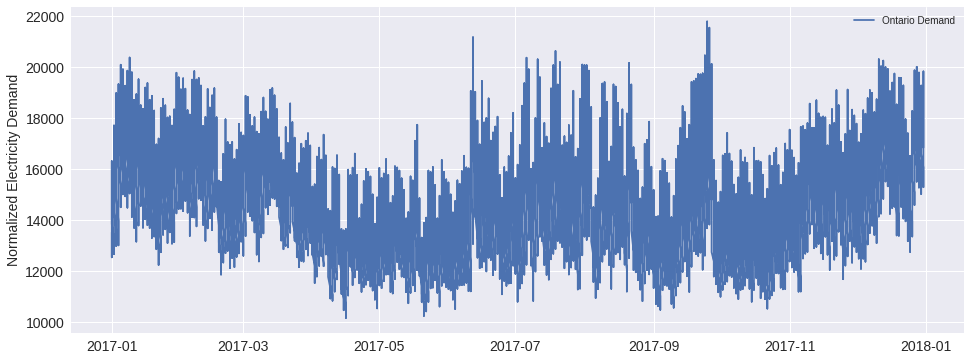

In [37]:
hourly_data = Demand['Ontario Demand'].resample('MS').mean().bfill()
plt.plot(Demand['Ontario Demand'], label='Ontario Demand')
#plt.plot(Demand_norm, label='Market Demand')
plt.ylabel('Normalized Electricity Demand')
plt.legend();

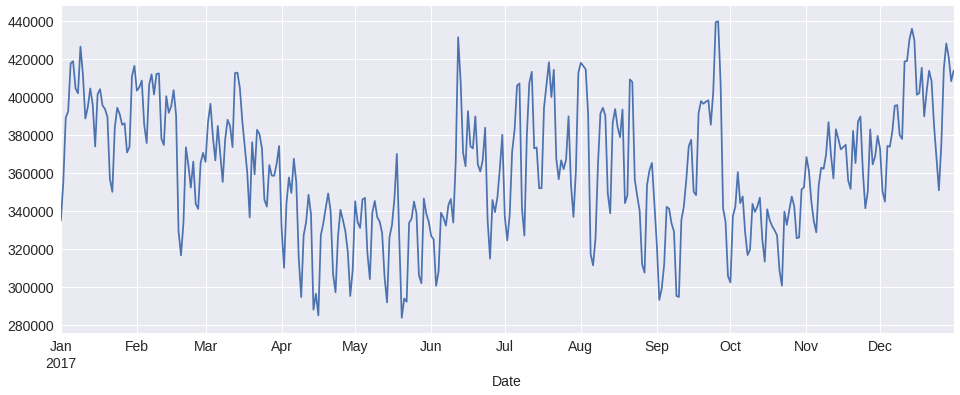

In [38]:
daily_data = Demand.resample(rule='D').sum()
daily_data = daily_data.asfreq('D')
daily_data.head(10)
daily_data['Ontario Demand'].plot();

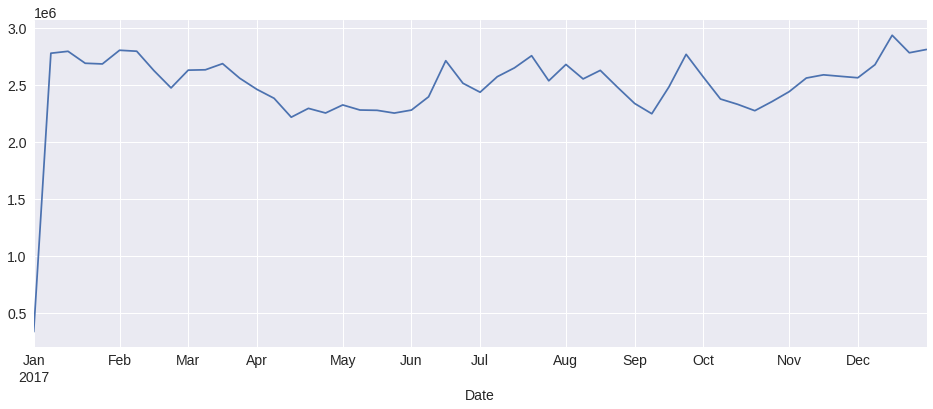

In [39]:
weekly_data = Demand.resample(rule='W').sum()
weekly_data = weekly_data.asfreq('W')
weekly_data['Ontario Demand'].plot();

In [40]:
#Now there's a tail end where it's not a full day, so it's dropping off.

#For our purposes, we will just delete that part day.

daily_data = daily_data.drop([daily_data.index.min(), daily_data.index.max()])

**Data Visualisation**
We can see the pattern in data- electricity usage seem to be very seasonal and repetitive. This makes sense, it migh be due to weather patterns,  holidays, weekends etc.
Furthermore, you can see the trend of the data seems to be trailing upwards in the last few years.

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.dates import DateFormatter

In [42]:
weekly_data = Ontario_Demand.resample(rule='W').sum()
decomposition = seasonal_decompose(weekly_data, model='additive') # Aggregate to weekly level

fig = decomposition.plot()
plt.show()

NameError: ignored